In [1]:
from features.build_design_matrix import build_design_matrix
from features.signal_engine import run_all_signals, collect_standardized_signals
from features.plotting import plot_all_series_diagnostics, plot_series_diagnostics
from importlib import reload
import features.signal_engine as se

reload(se)

X, specs = build_design_matrix(
    country="US",
    dropna=False,
    extend_to_current=True,
    verbose=True,
)

X.tail()
list(X.columns)
X.attrs["column_meta"]


C:\Users\Woli\PycharmProjects\macro_algo\features\build_design_matrix.py:47: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  y = s.resample("A").last()
C:\Users\Woli\PycharmProjects\macro_algo\features\build_design_matrix.py:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = (y / 12.0).resample("M").ffill()
C:\Users\Woli\PycharmProjects\macro_algo\features\build_design_matrix.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return s.resample("M").last()
C:\Users\Woli\PycharmProjects\macro_algo\features\build_design_matrix.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return s.resample("M").last()
C:\Users\Woli\PycharmProjects\macro_algo\features\build_design_matrix.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please 

[INFO] Added derived series: us_cpi_all_items_yoy (YoY %).
[INFO] Design matrix built (monthly EOM): shape=(780, 13) with 13 metrics (including derived).


C:\Users\Woli\PycharmProjects\macro_algo\features\build_design_matrix.py:36: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return s.resample("M").last()
C:\Users\Woli\PycharmProjects\macro_algo\features\build_design_matrix.py:193: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  infl_yoy = base.pct_change(12) * 100.0


{'us_net_migration_wb__persons_per_year_net_flow': {'name': 'us_net_migration_wb',
  'units': 'persons per year (net flow)',
  'category': 'immigration',
  'source': 'WorldBank: SM.POP.NETM',
  'description': 'US net migration (annual); mapped to monthly as annual/12.'},
 'us_avg_hourly_earnings__usd_per_hour': {'name': 'us_avg_hourly_earnings',
  'units': 'USD per hour',
  'category': 'wages',
  'source': 'FRED: CEU0500000003',
  'description': 'Average Hourly Earnings of All Employees, Total Private.'},
 'us_unemployment_rate__percent': {'name': 'us_unemployment_rate',
  'units': 'percent',
  'category': 'jobs',
  'source': 'FRED: UNRATE',
  'description': 'Unemployment Rate (U-3), monthly, percent.'},
 'us_nonfarm_payrolls__thousands_of_persons': {'name': 'us_nonfarm_payrolls',
  'units': 'thousands of persons',
  'category': 'jobs',
  'source': 'FRED: PAYEMS',
  'description': 'All Employees: Total Nonfarm Payrolls.'},
 'us_real_pce__billions_of_chained_2017_usd_saar': {'name': 'us

In [2]:
# 2. Compute signals
signals = run_all_signals(X)
uni = signals.univariate
nl = signals.nonlinear

std = collect_standardized_signals(X, signals)

# Examples:
std.level_z.tail()              # comparable z-scored levels
std.d1_z.tail()                 # standardized monthly changes
std.range_pos.tail()            # 0..1 within rolling range
std.nonlinearity_score.tail()   # 0+ curvature score (>=1 ~ notable)
std.big_move_flag.tail()        # 0/1 spikes
std.inflection_up.tail()        # 0/1 troughs
std.inflection_down.tail()      # 0/1 peaks

,us_net_migration_wb__persons_per_year_net_flow,us_avg_hourly_earnings__usd_per_hour,us_unemployment_rate__percent,us_nonfarm_payrolls__thousands_of_persons,us_real_pce__billions_of_chained_2017_usd_saar,us_cpi_all_items__index_1982_84=100,us_mich_exp_inflation__index,us_5y5y_fwd_infl__percent,us_household_liquid_assets__millions_of_usd,us_ig_oas__percent_oas,us_nonfarm_productivity__index,us_enplanements__thousands_of_passengers,us_cpi_all_items_yoy__percent
date,,,,,,,,,,,,,
2025-07-31,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-08-31,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-09-30,0,0,0,0,0,0,0,0,0,0,0,0,0
2025-10-31,0,0,0,0,0,0,0,0,0,0,0,0,1
2025-11-30,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:


sorted_cols = sorted(X.columns.tolist())
len(sorted_cols), sorted_cols[:20]





(13,
 ['us_5y5y_fwd_infl__percent',
  'us_avg_hourly_earnings__usd_per_hour',
  'us_cpi_all_items__index_1982_84=100',
  'us_cpi_all_items_yoy__percent',
  'us_enplanements__thousands_of_passengers',
  'us_household_liquid_assets__millions_of_usd',
  'us_ig_oas__percent_oas',
  'us_mich_exp_inflation__index',
  'us_net_migration_wb__persons_per_year_net_flow',
  'us_nonfarm_payrolls__thousands_of_persons',
  'us_nonfarm_productivity__index',
  'us_real_pce__billions_of_chained_2017_usd_saar',
  'us_unemployment_rate__percent'])

In [ ]:
# 3. All series (e.g. 2010+)
plot_all_series_diagnostics(
    X,
    uni=uni,
    nl=nl,
    start_year=2024,
)


In [10]:
from features.plotting import plot_series_diagnostics

# See available columns
list(X.columns)


['us_net_migration_wb__persons_per_year_net_flow',
 'us_avg_hourly_earnings__usd_per_hour',
 'us_unemployment_rate__percent',
 'us_nonfarm_payrolls__thousands_of_persons',
 'us_real_pce__billions_of_chained_2017_usd_saar',
 'us_cpi_all_items__index_1982_84=100',
 'us_mich_exp_inflation__index',
 'us_5y5y_fwd_infl__percent',
 'us_household_liquid_assets__millions_of_usd',
 'us_ig_oas__percent_oas',
 'us_nonfarm_productivity__index',
 'us_enplanements__thousands_of_passengers',
 'us_cpi_all_items_yoy__percent']

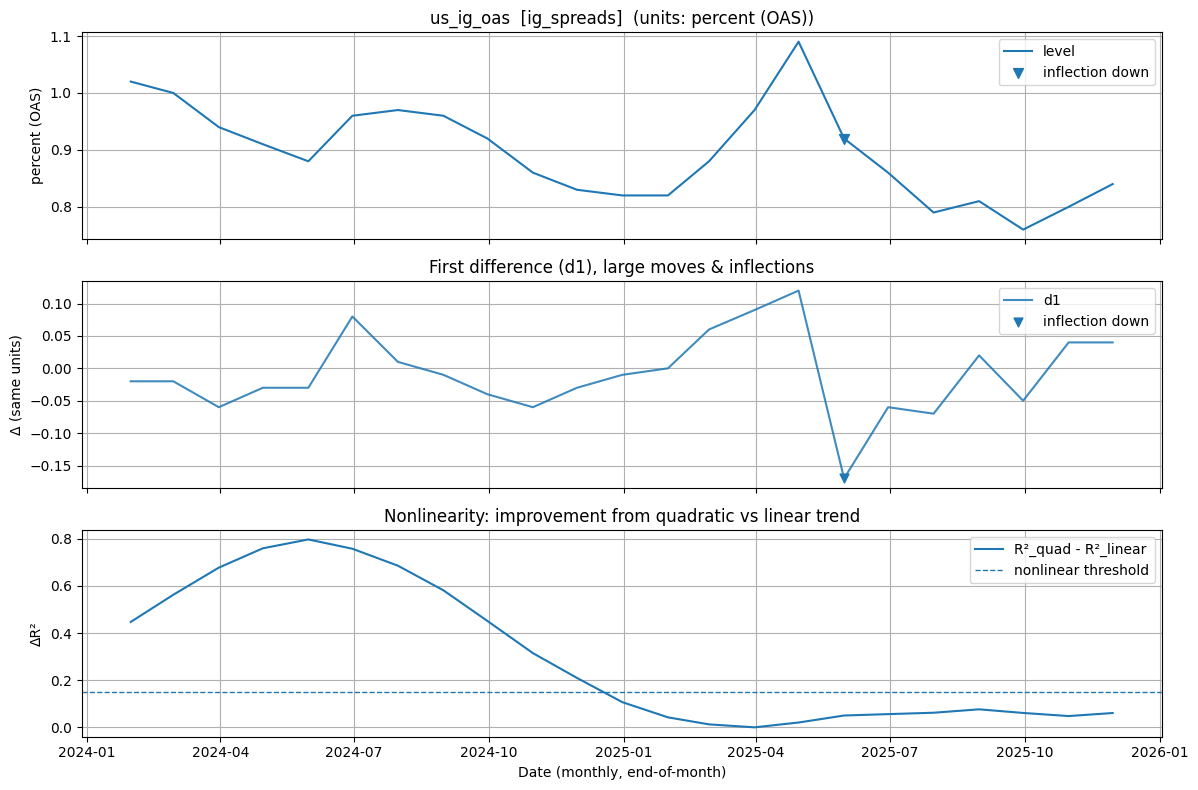

In [5]:
# 4. Example: zoom just IG OAS
ig_col = [c for c in X.columns if "us_ig_oas" in c][0]

plot_series_diagnostics(
    X,
    ig_col,
    uni=uni,
    nl=nl,
    start_year=2024,
)

In [17]:
import ipywidgets as widgets
from IPython.display import display, clear_output

from features.plotting import plot_series_diagnostics_compare

# Make sure we have the columns
sorted_cols = sorted(X.columns.tolist())

# --- Left / Right selectors as Combobox (type OR select) ---

left_input = widgets.Combobox(
    options=sorted_cols,
    description="Left:",
    placeholder="Type or pick column",
    ensure_option=True,                 # force valid column name
    layout=widgets.Layout(width="500px"),
)

right_input = widgets.Combobox(
    options=sorted_cols,
    description="Right:",
    placeholder="Type or pick column",
    ensure_option=True,
    layout=widgets.Layout(width="500px"),
)

# If you *prefer* classic dropdowns instead of comboboxes, swap to:
# left_input = widgets.Dropdown(options=[""] + sorted_cols, description="Left:")
# right_input = widgets.Dropdown(options=[""] + sorted_cols, description="Right:")

# --- Year sliders ---

min_year = int(X.index.min().year)
max_year = int(X.index.max().year)

start_year_slider = widgets.IntSlider(
    description="Start year",
    min=min_year,
    max=max_year,
    value=max(min_year, max_year - 10),
    layout=widgets.Layout(width="350px"),
)

end_year_slider = widgets.IntSlider(
    description="End year",
    min=min_year,
    max=max_year,
    value=max_year,
    layout=widgets.Layout(width="350px"),
)

# --- Raw vs Standardized toggle ---

mode_toggle = widgets.ToggleButtons(
    options=[("Raw", "raw"), ("Standardized", "std")],
    value="raw",
    description="View:",
    layout=widgets.Layout(width="300px"),
)

# --- Output area ---

out = widgets.Output()

def update_plot(*args):
    with out:
        clear_output(wait=True)

        left_col = left_input.value
        right_col = right_input.value
        sy = start_year_slider.value
        ey = end_year_slider.value
        mode = mode_toggle.value

        if sy > ey:
            print("Start year > End year. Fix the sliders.")
            return

        use_standardized = (mode == "std")

        plot_series_diagnostics_compare(
            X=X,
            uni=signals.univariate,
            nl=signals.nonlinear,
            left_col=left_col,
            right_col=right_col,
            std=std,
            use_standardized=use_standardized,
            start_year=sy,
            end_year=ey,
            meta=X.attrs.get("column_meta", {}),
        )

# Wire callbacks
left_input.observe(update_plot, names="value")
right_input.observe(update_plot, names="value")
start_year_slider.observe(update_plot, names="value")
end_year_slider.observe(update_plot, names="value")
mode_toggle.observe(update_plot, names="value")

# Layout
controls = widgets.VBox([
    widgets.HBox([left_input, right_input]),
    widgets.HBox([start_year_slider, end_year_slider]),
    mode_toggle,
])

display(controls, out)

# Initial (blank until you choose)
update_plot()


Output()

In [4]:
pack = signals
import pandas as pd
import numpy as np

meta = X.attrs.get("column_meta", {})
uni = pack.univariate
nl = pack.nonlinear

rows = []

for col in X.columns:
    s = X[col].dropna()
    if s.empty:
        continue

    info = meta.get(col, {})
    name = info.get("name", col)
    units = info.get("units", "")
    cat = info.get("category", "")

    start = s.index.min()
    end = s.index.max()
    n = len(s)

    # Big moves
    big = uni.d1_large_move.get(col)
    big_count = int(big.sum()) if big is not None else 0

    # Inflections up / down
    infl_dir = uni.inflection_direction.get(col)
    if infl_dir is not None:
        up_count = int((infl_dir == "up").sum())
        down_count = int((infl_dir == "down").sum())
    else:
        up_count = down_count = 0

    # Nonlinearity: raw + standardized
    nl_flag = nl.nonlinear_flag.get(col)
    nl_months = int(nl_flag.sum()) if nl_flag is not None else 0

    nl_score = std.nonlinearity_score.get(col) if hasattr(std, "nonlinearity_score") else None
    max_nl_score = float(nl_score.max()) if nl_score is not None and nl_score.notna().any() else np.nan

    # Quick auto-comments for sanity
    comments = []
    if n < 60:
        comments.append("SHORT_SERIES")
    if s.nunique() <= 3:
        comments.append("LOW_VARIATION")
    if big_count == 0 and up_count == 0 and down_count == 0 and nl_months == 0:
        comments.append("NO_SIGNAL")
    if max_nl_score >= 3:
        comments.append("EXTREME_NL_SCORE")
    if nl_months > 0 and (big_count + up_count + down_count) == 0:
        comments.append("NL_BUT_NO_EVENTS?")

    rows.append({
        "col": col,
        "name": name,
        "category": cat,
        "units": units,
        "n_obs": n,
        "start": start.strftime("%Y-%m"),
        "end": end.strftime("%Y-%m"),
        "big_moves": big_count,
        "infl_up": up_count,
        "infl_down": down_count,
        "nl_months": nl_months,
        "max_nl_score": round(max_nl_score, 2) if not np.isnan(max_nl_score) else "",
        "comments": ";".join(comments),
    })

diag = pd.DataFrame(rows)

# Sort to surface "interesting / suspicious" stuff first:
diag = diag.sort_values(
    by=["comments", "nl_months", "big_moves", "infl_up", "infl_down"],
    ascending=[False, False, False, False, False]
).reset_index(drop=True)

pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", 120)

diag


,col,name,category,units,n_obs,start,end,big_moves,infl_up,infl_down,nl_months,max_nl_score,comments
0,us_unemployment_rate__percent,us_unemployment_rate,jobs,percent,428,1990-01,2025-08,19,38,38,24,1.72,
1,us_nonfarm_payrolls__thousands_of_persons,us_nonfarm_payrolls,jobs,thousands of persons,428,1990-01,2025-08,25,11,8,19,1.92,
2,us_nonfarm_productivity__index,us_nonfarm_productivity,productivity,index,424,1990-03,2025-06,30,0,0,11,1.73,
3,us_household_liquid_assets__millions_of_usd,us_household_liquid_assets,cash_assets,millions of USD,424,1990-03,2025-06,35,0,0,8,1.51,
4,us_ig_oas__percent_oas,us_ig_oas,ig_spreads,percent (OAS),348,1996-12,2025-11,27,19,32,7,1.58,
5,us_cpi_all_items_yoy__percent,us_cpi_all_items_yoy,inflation,percent,419,1991-01,2025-11,17,35,43,6,1.45,
6,us_net_migration_wb__persons_per_year_net_flow,us_net_migration_wb,immigration,persons per year (net flow),769,1960-12,2024-12,42,0,0,4,1.06,
7,us_cpi_all_items__index_1982_84=100,us_cpi_all_items,inflation,"index, 1982-84=100",429,1990-01,2025-09,20,11,19,4,1.40,
8,us_mich_exp_inflation__index,us_mich_exp_inflation,inflation_expectations_survey,index,429,1990-01,2025-09,22,38,44,2,1.13,
9,us_enplanements__thousands_of_passengers,us_enplanements,activity_high_freq,thousands of passengers,307,2000-01,2025-07,22,44,31,0,0.00,
